Text(0.5, 1.0, 'Simple CPU Ray Tracer')

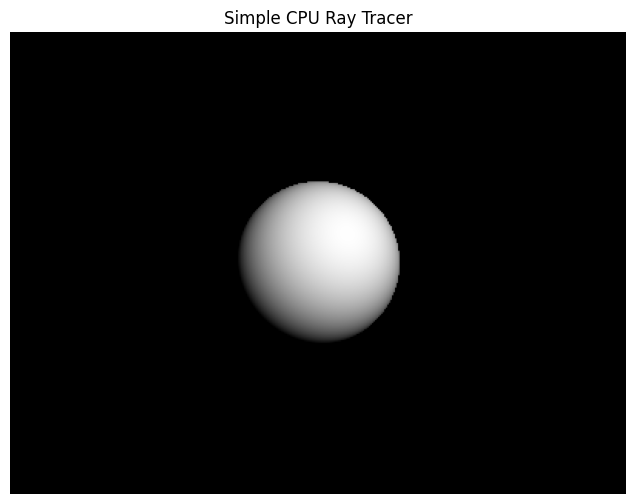

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
width, height = 400, 300

# Camera parameters
fov = np.pi / 3.0
aspect_ratio = width / height
camera_origin = np.array([0.0, 0.0, 0.0])

# Scene: a single sphere and a light
sphere_center = np.array([0.0, 0.0, 5.0])
sphere_radius = 1.0
light_position = np.array([5.0, 5.0, -10.0])
light_color = np.array([1.0, 1.0, 1.0])

# Ray-sphere intersection
def intersect_sphere(ro, rd, center, radius):
    oc = ro - center
    a = np.dot(rd, rd)
    b = 2.0 * np.dot(oc, rd)
    c = np.dot(oc, oc) - radius * radius
    discriminant = b * b - 4 * a * c
    if discriminant < 0:
        return np.inf
    sqrt_disc = np.sqrt(discriminant)
    t1 = (-b - sqrt_disc) / (2.0 * a)
    t2 = (-b + sqrt_disc) / (2.0 * a)
    if t1 > 1e-4:
        return t1
    if t2 > 1e-4:
        return t2
    return np.inf

# Compute color for a ray
def trace_ray(ro, rd):
    t = intersect_sphere(ro, rd, sphere_center, sphere_radius)
    if t == np.inf:
        return np.array([0.0, 0.0, 0.0])  # background color
    
    # Compute intersection and normal
    hit = ro + rd * t
    normal = (hit - sphere_center)
    normal /= np.linalg.norm(normal)
    
    # Simple Lambertian shading
    to_light = light_position - hit
    to_light /= np.linalg.norm(to_light)
    diff_intensity = max(np.dot(normal, to_light), 0.0)
    
    color = diff_intensity * light_color
    return np.clip(color, 0.0, 1.0)

# Render
image = np.zeros((height, width, 3), dtype=np.float32)
for j in range(height):
    for i in range(width):
        # Convert pixel coordinate to normalized device coordinates
        x = (2 * (i + 0.5) / width - 1) * np.tan(fov / 2) * aspect_ratio
        y = -(2 * (j + 0.5) / height - 1) * np.tan(fov / 2)
        rd = np.array([x, y, 1.0])
        rd /= np.linalg.norm(rd)
        image[j, i] = trace_ray(camera_origin, rd)

# Display
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Simple CPU Ray Tracer")
